# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Ade Alvi
- **Email:** adealvi672@gmail.com
- **ID Dicoding:** ade_alvii

## Menentukan Pertanyaan Bisnis

- Bagaimana performa kategori produk berdasarkan stok ulasan pelanggan?
- Kategori Produk mana yang memberikan revenue tertinggi?
- Negara manakah yang mendatangkan jumlah penjualan produk tertinggi?
- Kapan transaksi terakhir dilakukan pelanggan?
- Sesering apa pelanggan melakukan transaksi?
- Seberapa banyak uang yang dikeluarkan pelanggan untuk melakukan transaksi?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
from datetime import datetime

## Data Wrangling

### Gathering Data

- Customers Dataset <br>
**customers_datasets** ini memiliki informasi tentang customers dan lokasinya

In [4]:
# cust_df =   pd.read_csv('https://raw.githubusercontent.com/adeal25/EDA_Ecommerce/main/data/customers_dataset.csv')
cust_df =   pd.read_csv('data/customers_dataset.csv')
cust_df.shape

(99441, 5)

*Tabel customers menghimpun 99441 row dan memiliki 5 columns*

In [5]:
cust_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


- Order Items Dataset <br>
Dataset **order_items** mencakup data tentang item yang dibeli dalam setiap pesanan. <br>
berdasarkan dokumentasi pada sumber tiap order_id dapat membeli produk yang sama dengan jumlah tertentu. Setiap item memiliki bobot tertentu, karena itu ongkos kirim di hitung berdasarkan bobotnya. Kita akan melakukan kalkulasi lebih dalam di proses berikutnya

In [6]:
# orderitems_df = pd.read_csv("https://raw.githubusercontent.com/adeal25/EDA_Ecommerce/main/data/order_items_dataset.csv")
orderitems_df = pd.read_csv('data/order_items_dataset.csv')
orderitems_df.shape

(112650, 7)

*order_items dataset memiliki total 112650 rows dan 7 columns*

In [7]:
orderitems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


- Product Dataset <br>
**products_datasets** Memiliki informasi Produk yang telah terjual

In [8]:
# products_df = pd.read_csv("https://raw.githubusercontent.com/adeal25/EDA_Ecommerce/main/data/products_dataset.csv")
products_df = pd.read_csv('data/products_dataset.csv')
products_df.shape

(32951, 9)

*dataset products memiliki 32951 baris dan 9 columns*

In [9]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


- Product Category Name Translation Dataset <br>
**product_category_name_translation** dataset ini memiliki informasi terjemahan produk kategori dalam bahasa inggris 

In [10]:
product_eng_df = pd.read_csv('data/product_category_name_translation.csv')
# product_eng_df = pd.read_csv("https://raw.githubusercontent.com/adeal25/EDA_Ecommerce/main/data/products_category_name_translation.csv")
product_eng_df.shape

(71, 2)

*Product category name translation memiliki 71 baris data dan 2 kolom*

In [11]:
product_eng_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


- Order Review Dataset <br>
Data **order_reviews_dataset**  ini mencakup data tentang ulasan/review yang dibuat oleh customers.

In [12]:
review_df = pd.read_csv("data/order_reviews_dataset.csv")
# review_df = pd.read_csv("https://raw.githubusercontent.com/adeal25/EDA_Ecommerce/main/data/order_reviews_dataset.csv")
review_df.shape


(99224, 7)

*dataset order review memiliki total 99224 baris dan 7 kolom*

In [13]:
review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


- Payment Order Dataset <br>
Dataset ini mencakup data tentang opsi pembayaran pesanan.

In [14]:
pay_df = pd.read_csv('data/order_payments_dataset.csv')
# pay_df = pd.read_csv('https://raw.githubusercontent.com/adeal25/EDA_Ecommerce/main/data/order_payments_dataset.csv')
pay_df.shape


(103886, 5)

*Tabel order payment memiliki total 103886 baris dengan jumlah kolom 5*

In [15]:
pay_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


- Order Dataset <br>
Main dataset, dataset ini menghimpun seluruh informasi tentang order yang mana tiap2 tabel yang kita gunakan memiliki relationship dengan tabel ini.

In [16]:
orders_df = pd.read_csv("data/orders_dataset.csv")
# orders_df = pd.read_csv("https://raw.githubusercontent.com/adeal25/EDA_Ecommerce/main/data/order_dataset.csv")
orders_df.shape

(99441, 8)

*dataset orders memiliki 99441 baris dan 8 kolom*

In [17]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Assessing Data

Pada tahap ini dilakukan penilaian terhadap tiap tiap dataset
- Assess customers data

In [18]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [19]:
cust_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [20]:
cust_df.duplicated().sum()

0

In [21]:
cust_df.nunique(axis=0)

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

*Terdapat 96096 unique customers pada data*

In [22]:
cust_df.customer_city.unique()

array(['franca', 'sao bernardo do campo', 'sao paulo', ...,
       'monte bonito', 'sao rafael', 'eugenio de castro'], dtype=object)

In [23]:
cust_df.customer_state.unique()

array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

- Assess Order Items 

In [24]:
orderitems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


*pada column __shipping_limit_date__ tipe datanya masih belum sesuai, kita akan convert menjadi format  datetime  pada proses cleaning nanti*

In [25]:
orderitems_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [26]:
orderitems_df.duplicated().sum()

0

In [27]:
orderitems_df.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

- Assess Products

In [28]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [29]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

*Terdapat missing value pada __product_category_name__, dan lainnya. Karena kita hanya akan pakai __product_category_name__ maka missing value ini akan kita isi dengan "uncategorized", sisa lainnya tidak akan kita gunakan*

In [30]:
products_df.duplicated().sum()

0

- Assess Product Category English

In [31]:
product_eng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [32]:
product_eng_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [33]:
product_eng_df.duplicated().sum()

0

- Assess Order Reviews


In [34]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


*Terdapat ketidaksesuaian format datetime, tapi seharusnya ini tidak akan pengaruh karena tidak berhubungan dengan pertanyaan bisnis kita. Pada proses cleaning nnti ini akan kita hapus karena belum kita butuhkan*

- Assess Order Payment 

In [35]:
pay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [36]:
pay_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [37]:
pay_df.nunique(axis=0)

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

In [38]:
pay_df.payment_type.unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [39]:
pay_df.duplicated().sum()

0

- Assess Data Order

In [40]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


*Terdapat ketidaksesuaian format tipe data pada beberapa kolom. Kita akan mempertimbangkan convert data to datetime pada tahap cleaning data nanti*

In [41]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

*Beberapa kolom missing value namun karena kita ndak menggnakannya untuk saat ini maka kita akan biarkan terlebih dahulu*

In [42]:
orders_df.duplicated().sum()

0

In [43]:
orders_df.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [44]:
orders_df.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

### Cleaning Data

- Cleaning data order items

In [45]:
# Mengubah tipe data shipping_limit_date menjadi format datatime
orderitems_df["shipping_limit_date"] = pd.to_datetime(orderitems_df["shipping_limit_date"])

In [46]:
orderitems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Berdasarkan deskripsi dataset pada sumber ada beberapa hal yang perlu kita kalkulasikan pada Order Items tabel ini
1. Total order item value, merupakan hasil kali dari harga dengan jumlah order item (price * order_item_id)
2. Total freight value, merupakan hasil kali dari harga kirim dengan order item (freight_value * orfer_item_id)
3. Total order value, dihitung dari total ordeer item value + total freight value

In [47]:
orderitems_df['total_orderitem_value'] = orderitems_df['price'] * orderitems_df['order_item_id']
orderitems_df['total_freight_value'] = orderitems_df['freight_value'] * orderitems_df['order_item_id']
orderitems_df['total_order_value'] = orderitems_df['total_orderitem_value'] + orderitems_df['total_freight_value']

In [48]:
orderitems_df['total_order_value'].describe(include='all')

count    112650.000000
mean        160.304175
std         228.532489
min           6.080000
25%          61.070000
50%         103.550000
75%         175.870000
max       13664.080000
Name: total_order_value, dtype: float64

- Cleaning Product dan Produk Name English Data <br>
dari hasil penilaian sebelumnya ditemukan missing value pada product_category_name

In [49]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Merge products_df dengan product_eng_df

In [50]:
products_df = pd.merge(products_df, product_eng_df, on="product_category_name", how="outer")

In [51]:
products_df.isna().sum()

product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64

In [52]:
products_df['product_category_name'].fillna(value="uncategorized", inplace=True)
products_df['product_category_name_english'].fillna(value="uncategorized", inplace=True)

C:\Users\adeal\AppData\Local\Temp\ipykernel_3240\3256587171.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_category_name'].fillna(value="uncategorized", inplace=True)
C:\Users\adeal\AppData\Local\Temp\ipykernel_3240\3256587171.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [53]:
products_df.isna().sum()

product_id                         0
product_category_name              0
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english      0
dtype: int64

- Cleaning data Order Review

In [54]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [55]:
# Mengubah format datetime
review_df['review_creation_date'] = pd.to_datetime(review_df['review_creation_date'])
review_df['review_answer_timestamp'] = pd.to_datetime(review_df['review_answer_timestamp'])

- Cleaning data Order 

In [56]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Mengubah column dengan format datetime yang masih belum sesuai

In [57]:
dtetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in dtetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [58]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


## Exploratory Data Analysis (EDA)

### Explore data cust_df

In [59]:
cust_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [60]:
top_cust_cities = cust_df.groupby(by='customer_city').customer_id.nunique().sort_values(ascending=False)
top_cust_cities.head()

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
Name: customer_id, dtype: int64

In [61]:
top_cust_states = cust_df.groupby(by='customer_state').customer_id.nunique().sort_values(ascending=False)
top_cust_states.head(5)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
Name: customer_id, dtype: int64

### Explore orderitems_df

In [62]:
orderitems_df.total_order_value.describe()

count    112650.000000
mean        160.304175
std         228.532489
min           6.080000
25%          61.070000
50%         103.550000
75%         175.870000
max       13664.080000
Name: total_order_value, dtype: float64

### Explore products_df

In [63]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,07f01b6fcacc1b187a71e5074199db2d,agro_industria_e_comercio,39.0,430.0,1.0,16400.0,63.0,66.0,56.0,agro_industry_and_commerce
1,613d093272cb8f74f25a01e430155a6a,agro_industria_e_comercio,39.0,326.0,1.0,1050.0,38.0,41.0,39.0,agro_industry_and_commerce
2,980ecbcc15fe174ec1e5757c4d75b1bf,agro_industria_e_comercio,48.0,157.0,1.0,250.0,17.0,3.0,10.0,agro_industry_and_commerce
3,ba1d7e7ee1f055d252a2faa8ea3cea9b,agro_industria_e_comercio,59.0,693.0,6.0,1900.0,45.0,15.0,40.0,agro_industry_and_commerce
4,137ace556a03792cdc43f91ec621426d,agro_industria_e_comercio,48.0,1268.0,1.0,550.0,16.0,19.0,11.0,agro_industry_and_commerce


In [64]:
products_df.groupby(by='product_category_name_english').product_id.nunique().sort_values(ascending=False).reset_index().head(10)

,product_category_name_english,product_id
0,bed_bath_table,3029
1,sports_leisure,2867
2,furniture_decor,2657
3,health_beauty,2444
4,housewares,2335
5,auto,1900
6,computers_accessories,1639
7,toys,1411
8,watches_gifts,1329
9,telephony,1134


### Explore review_df

In [65]:
review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [66]:
review_df['review_score'].value_counts()

review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: count, dtype: int64

### Explore Order payment (pay_df)

In [67]:
pay_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [68]:
pay_df['payment_type'].value_counts()


payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

In [69]:
pay_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### Explore Data Order (orders_df)

In [70]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [71]:
orders_df['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [72]:
# Purchase terbanyak dalam 2 tahun terakhir
purchace = orders_df.resample('D', on='order_purchase_timestamp').size().sort_values(ascending=False).head(10)
purchace

order_purchase_timestamp
2017-11-24    1176
2017-11-25     499
2017-11-27     403
2017-11-26     391
2017-11-28     380
2018-08-06     372
2018-05-07     372
2018-08-07     370
2018-05-14     364
2018-05-16     357
dtype: int64

### Explore korelasi antara variabel

Merging tiap dataframe yang saling memiliki relasi

In [73]:
all_df = cust_df.copy()

In [74]:
all_df = pd.merge(all_df, orders_df, on='customer_id')

In [75]:
all_df = pd.merge(all_df, review_df, on='order_id')

In [76]:
all_df = pd.merge(all_df, pay_df, on='order_id')

In [77]:
all_df = pd.merge(all_df, orderitems_df, on='order_id')

In [78]:
all_df = pd.merge(all_df, products_df, on='product_id')

In [79]:
all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,total_order_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,146.87,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,335.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,157.73,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,173.30,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,252.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort


In [80]:
all_df.isna().sum().sort_values(ascending=False)

review_comment_title             103437
review_comment_message            67650
order_delivered_customer_date      2471
product_name_lenght                1695
product_photos_qty                 1695
product_description_lenght         1695
order_delivered_carrier_date       1235
product_width_cm                     20
product_height_cm                    20
product_length_cm                    20
product_weight_g                     20
order_approved_at                    15
total_orderitem_value                 0
shipping_limit_date                   0
price                                 0
freight_value                         0
customer_id                           0
total_freight_value                   0
total_order_value                     0
product_category_name                 0
product_id                            0
seller_id                             0
payment_installments                  0
order_item_id                         0
order_estimated_delivery_date         0


In [81]:
all_df.drop(['review_comment_title', 'review_comment_message', 'product_name_lenght', 
            'product_photos_qty', 'product_description_lenght',
            'product_width_cm','product_height_cm', 'product_length_cm', 'product_weight_g'], axis=1, inplace=True)

In [82]:
all_df.isna().sum().sort_values(ascending=False)

order_delivered_customer_date    2471
order_delivered_carrier_date     1235
order_approved_at                  15
payment_value                       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
customer_id                         0
payment_type                        0
price                               0
freight_value                       0
total_orderitem_value               0
total_freight_value                 0
total_order_value                   0
product_category_name               0
payment_installments                0
review_answer_timestamp             0
payment_sequential                  0
customer_unique_id                  0
review_creation_date                0
review_score                        0
review_id                           0
order_estimated_delivery_date       0
order_purchase_timestamp            0
order_status                        0
order_id    

In [83]:
# Continue
pd.set_option('display.max_columns', None)
all_df.describe()

,customer_zip_code_prefix,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,review_creation_date,review_answer_timestamp,payment_sequential,payment_installments,payment_value,order_item_id,shipping_limit_date,price,freight_value,total_orderitem_value,total_freight_value,total_order_value
count,117329.000000,117329,117314,116094,114858,117329,117329.000000,117329,117329,117329.000000,117329.000000,117329.000000,117329.000000,117329,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000
mean,35060.118112,2017-12-30 10:29:39.749081600,2017-12-30 21:58:19.189721344,2018-01-03 12:09:47.466820096,2018-01-12 23:40:18.665604608,2018-01-23 07:08:36.977047552,4.031467,2018-01-11 23:57:07.684545280,2018-01-15 03:28:45.726342400,1.094452,2.940151,172.062565,1.194121,2018-01-06 02:01:32.273274368,120.524349,20.027514,136.282716,23.586741,159.869456
min,1003.000000,2016-09-04 21:15:19,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-20 00:00:00,1.000000,2016-10-15 00:00:00,2016-10-16 03:20:17,1.000000,0.000000,0.000000,1.000000,2016-09-19 00:15:34,0.850000,0.000000,0.850000,0.000000,6.080000
25%,11250.000000,2017-09-11 16:37:08,2017-09-12 04:35:32.500000,2017-09-14 20:27:55.249999872,2017-09-23 00:28:20.500000,2017-10-03 00:00:00,4.000000,2017-09-22 00:00:00,2017-09-25 23:24:55,1.000000,1.000000,60.750000,1.000000,2017-09-18 15:55:47,39.900000,13.080000,44.990000,13.750000,61.050000
50%,24240.000000,2018-01-18 09:42:57,2018-01-18 14:16:46,2018-01-23 18:50:08,2018-02-01 16:15:39.500000,2018-02-14 00:00:00,5.000000,2018-02-01 00:00:00,2018-02-03 23:11:32,1.000000,2.000000,108.100000,1.000000,2018-01-25 09:09:32,74.900000,16.280000,83.900000,17.260000,103.160000
75%,58770.000000,2018-05-03 19:53:54,2018-05-04 04:11:43.500000,2018-05-07 15:25:00,2018-05-15 14:03:23.500000,2018-05-25 00:00:00,5.000000,2018-05-15 00:00:00,2018-05-17 16:20:40,1.000000,4.000000,189.060000,1.000000,2018-05-10 03:31:06,134.900000,21.180000,149.900000,24.930000,175.570000
max,99990.000000,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35,29.000000,24.000000,13664.080000,21.000000,2020-04-09 22:35:08,6735.000000,409.680000,13440.000000,1794.960000,13664.080000
std,29849.496175,NaN,NaN,NaN,NaN,NaN,1.387927,NaN,NaN,0.731174,2.775370,265.388194,0.684225,NaN,182.944843,15.828077,215.717138,24.850989,226.615422


In [84]:
# Categorical
pd.set_option('display.max_columns', None)
all_df.describe(include = 'object').T

,count,unique,top,freq
customer_id,117329,97916,270c23a11d024a44c896d1894b261a83,63
customer_unique_id,117329,94720,9a736b248f67d166d2fbb006bcb877c3,75
customer_city,117329,4108,sao paulo,18582
customer_state,117329,27,SP,49527
order_id,117329,97916,895ab968e7bb0d5659d16cd74cd1650c,63
order_status,117329,7,delivered,114859
review_id,117329,97708,eef5dbca8d37dfce6db7d7b16dd0525e,63
payment_type,117329,4,credit_card,86520
product_id,117329,32789,aca2eb7d00ea1a7b8ebd4e68314663af,533
seller_id,117329,3090,4a3ca9315b744ce9f8e9374361493884,2128


## Visualization & Explanatory Analysis

### Pertanyaan 1:

- Bagaimana performa kategori produk berdasarkan score review customers?

C:\Users\adeal\AppData\Local\Temp\ipykernel_3240\2199144150.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'review_score', y = 'category_eng', data=top_cat_product_review, palette='magma', ax=ax[0])
C:\Users\adeal\AppData\Local\Temp\ipykernel_3240\2199144150.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'review_score', y = 'category_eng', data=low_cat_product_review, palette='magma', ax=ax[1])


<function matplotlib.pyplot.show(close=None, block=None)>

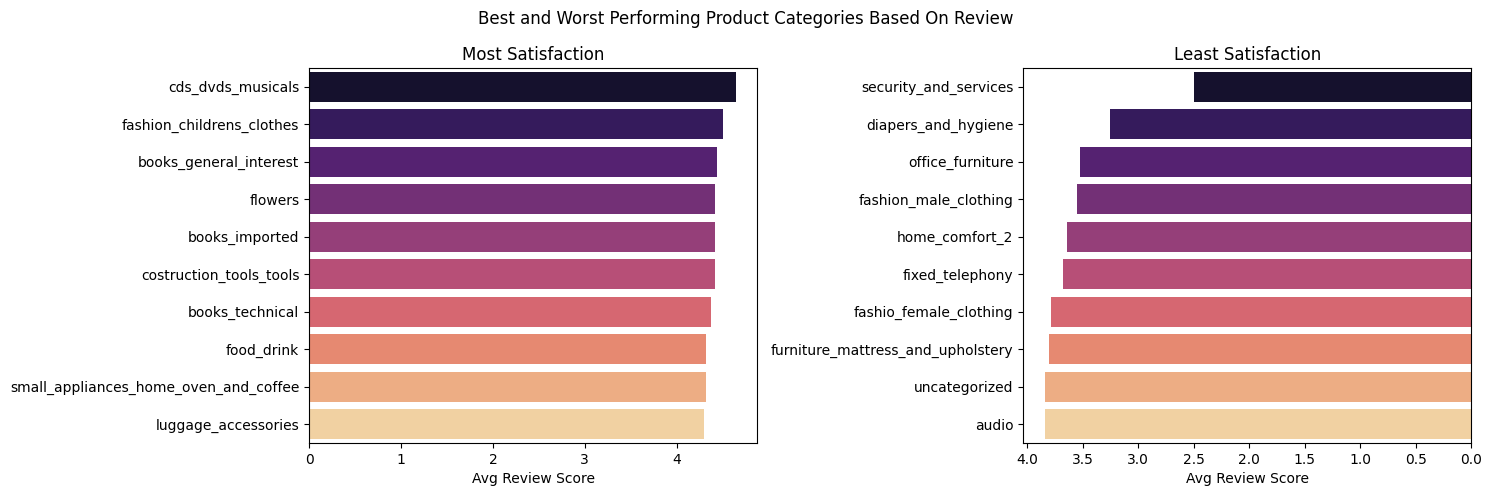

In [85]:
fig, ax = plt.subplots(nrows= 1, ncols= 2, figsize=(15, 5))

all_df.rename(columns={
    "product_category_name_english" : "category_eng"
}, inplace=True)

top_cat_product_review = all_df.groupby(by=['category_eng']).review_score.mean().reset_index().sort_values(by='review_score', ascending = False).head(10)
sns.barplot(x = 'review_score', y = 'category_eng', data=top_cat_product_review, palette='magma', ax=ax[0])
ax[0].set_xlabel('Avg Review Score')
ax[0].set_ylabel(None)
ax[0].set_title('Most Satisfaction')

low_cat_product_review = all_df.groupby(by=['category_eng']).review_score.mean().reset_index().sort_values(by='review_score', ascending = True).head(10)
sns.barplot(x = 'review_score', y = 'category_eng', data=low_cat_product_review, palette='magma', ax=ax[1])
ax[1].set_xlabel('Avg Review Score')
ax[1].set_ylabel(None)
ax[1].invert_xaxis()
ax[1].set_title('Least Satisfaction')

plt.suptitle('Best and Worst Performing Product Categories Based On Review')
plt.tight_layout(pad = 1)
plt.show


### Pertanyaan 2:

- Kategori Produk mana yang memberikan revenue tertinggi?


C:\Users\adeal\AppData\Local\Temp\ipykernel_3240\3644748385.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'payment_value', y = 'category_eng', data=top_cat_product_revenue, palette='viridis', ax=ax[0])
C:\Users\adeal\AppData\Local\Temp\ipykernel_3240\3644748385.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'payment_value', y = 'category_eng', data=low_cat_product_revenue, palette='viridis', ax=ax[1])


<function matplotlib.pyplot.show(close=None, block=None)>

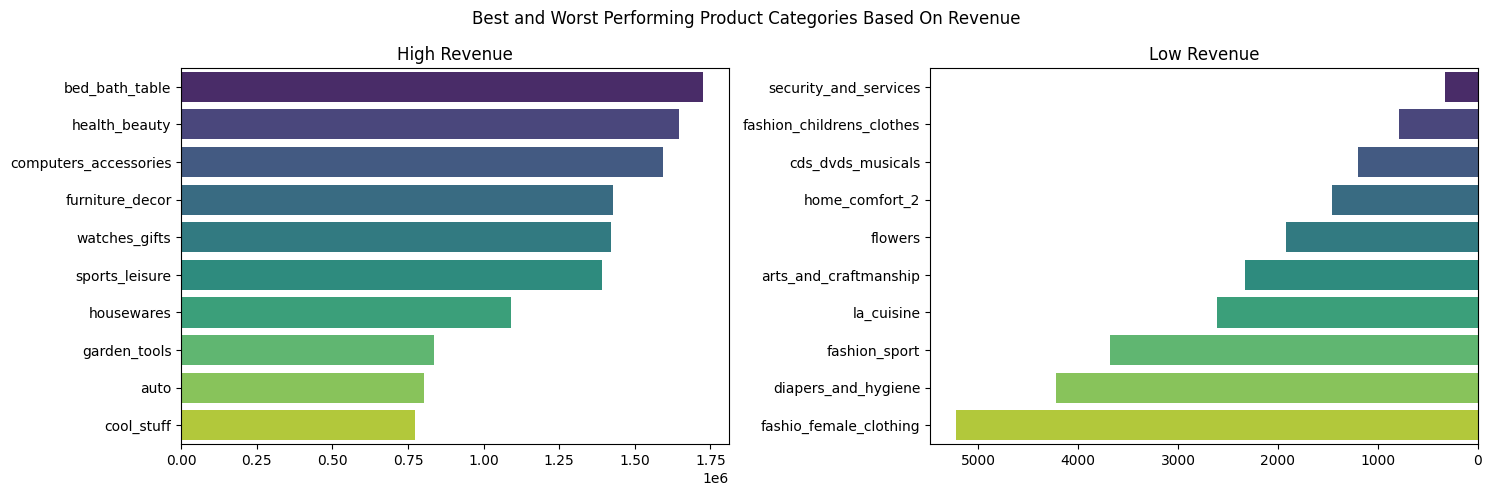

In [86]:

fig, ax = plt.subplots(nrows= 1, ncols= 2, figsize=(15, 5))

all_df.rename(columns={
    "product_category_name_english" : "category_eng"
}, inplace=True)

top_cat_product_revenue = all_df.groupby(by=['category_eng']).payment_value.sum().reset_index().sort_values(by='payment_value', ascending = False).head(10)
sns.barplot(x = 'payment_value', y = 'category_eng', data=top_cat_product_revenue, palette='viridis', ax=ax[0])
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].set_title('High Revenue')

low_cat_product_revenue = all_df.groupby(by=['category_eng']).payment_value.sum().reset_index().sort_values(by='payment_value', ascending = True).head(10)
sns.barplot(x = 'payment_value', y = 'category_eng', data=low_cat_product_revenue, palette='viridis', ax=ax[1])
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].invert_xaxis()
ax[1].set_title('Low Revenue')

plt.suptitle('Best and Worst Performing Product Categories Based On Revenue')
plt.tight_layout(pad = 1)
plt.show


### Pertanyaan 3

- Negara manakah yang mendatangkan jumlah penjualan produk tertinggi?

C:\Users\adeal\AppData\Local\Temp\ipykernel_3240\2200218975.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = "order_id", x = "customer_state", data = top_states_revenue, palette = 'plasma')


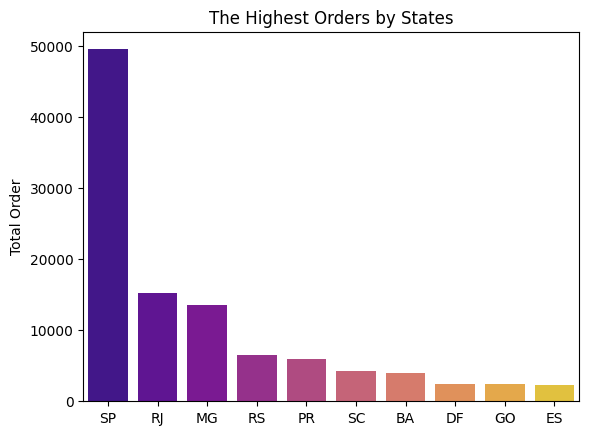

In [87]:
top_states_revenue = all_df.groupby("customer_state")["order_id"].count().reset_index().sort_values("order_id", ascending = False).head(10)

sns.barplot(y = "order_id", x = "customer_state", data = top_states_revenue, palette = 'plasma')
plt.ylabel("Total Order")
plt.xlabel(None)
plt.title("The Highest Orders by States")
plt.show()

### Pertanyaan 4-6
RFM (Recency, Frequency, Monetary)


- Kapan transaksi terakhir dilakukan pelanggan? (Recency)
- Sesering apa pelanggan melakukan transaksi? (Frequency)
- Seberapa banyak uang yang dikeluarkan pelanggan untuk melakukan transaksi? (Monetary)

#### RFM Analysis

In [96]:
all_df['id'] = all_df['customer_unique_id'].str[:5]

rfm_df = all_df.groupby(by="id", as_index=False).agg({
    "order_purchase_timestamp" : "max",
    "order_id" : "nunique",
    "payment_value" : "sum"
})

rfm_df.columns = ["cust_id", "max_order_timestamp", "frequency", "monetary"]

rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace= True)
rfm_df.head()

,cust_id,frequency,monetary,recency
0,00003,1,141.90,160
1,0000b,1,27.19,163
2,0000f,2,129.84,370
3,0004a,1,196.89,337
4,0004b,1,166.98,195


C:\Users\adeal\AppData\Local\Temp\ipykernel_3240\2459287108.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="cust_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\adeal\AppData\Local\Temp\ipykernel_3240\2459287108.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="cust_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\adeal\AppData\Local\Temp\ipykernel_3240\2459287108.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sa

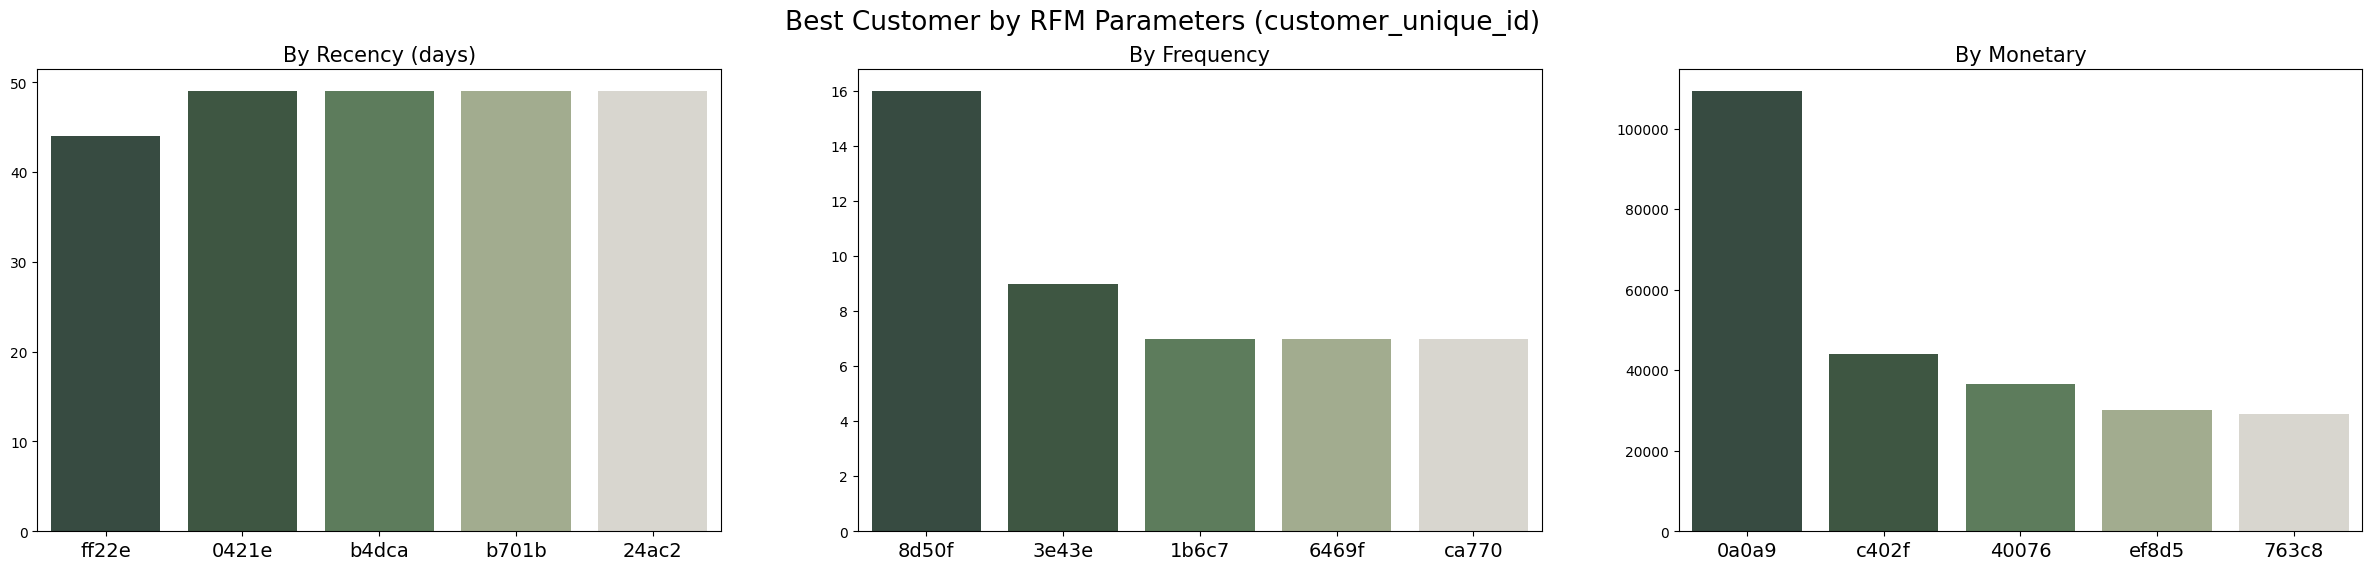

In [98]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30,6))

colors = ["#344e41", "#3a5a40", "#588157", "#a3b18a", "#dad7cd"]

sns.barplot(y="recency", x="cust_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=15)
ax[0].tick_params(axis = 'x', labelsize=14)

sns.barplot(y="frequency", x="cust_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=15)
ax[1].tick_params(axis = 'x', labelsize=14)

sns.barplot(y="monetary", x="cust_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=15)
ax[2].tick_params(axis = 'x', labelsize=14)

plt.suptitle("Best Customer by RFM Parameters (customer_unique_id)", fontsize=19)
plt.show()

## Conclusion

1.Most and Least Satisfaction Customers Based on Avg Score Review
- Rata-rata review score customers berdasarkan product category dapat di simpulkan product kategori yang memiliki rata-rata ulasan kepuasan customers tertinggi adalah csc_dcds_musicals, fashion_childrens_clothes, dan books_general_interest.
 
 - Sedangkan Produk kategori dengan rata-rata nilai ulasan rendah adalah produk kategori security_and_service, diapers_and_hygiene, dan office_furniture

2. Best and Worst Product Category Based on Revenue
- Produk kategori yang menyumbang revenue tertinggi adalah bed_bath_table sedangkan Produk kategori yang menyumbang revenue terendah adalah security_and_service

3. The Highest Order by States
- Total penjualan produk tertinggi ada pada state SP sedangkan penjualan produk terendah state ES
4. RFM Analysis
- Dari visualisasi data di atas, kita dapat melihat beberapa pelanggan terbaik berdasarkan ketiga parameter (recency, frequency, dan montary). Informasi ini tentunya dapat membantu kita untuk membuat analisis marketing menyelesaikan persoalan bisnis

In [90]:
all_df.to_csv("main_data.csv", index=False)